## Pre-processing

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
st = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/st_vote.csv'
tr = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/thairath.csv'
tns = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/topnews.csv'
eig = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/eigth.csv'
o = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/one.csv'

# Read the CSV file into a pandas DataFrame
stdf = pd.read_csv(st, usecols=['text', 'vote','comment_id'])
thair= pd.read_csv(tr, usecols=['text', 'vote','comment_id'])
tnews = pd.read_csv(tns , usecols=['text', 'vote','comment_id'])
eigth = pd.read_csv(eig, usecols=['text', 'vote','comment_id'])
one = pd.read_csv(o, usecols=['text', 'vote','comment_id'])
# Merge DataFrames
merged_df = pd.concat([stdf, thair, tnews, eigth, one], ignore_index=True)
# Rename the 'vote' column to 'sentiment'
merged_df = merged_df.rename(columns={'vote': 'sentiment'})
merged_df = merged_df.drop_duplicates(subset='comment_id', keep='first')
print(len(stdf))
print(len(thair))
print(len(tnews))
print(len(eigth))
print(len(one))
print('รวม',len(merged_df))
merged_df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
10149
53637
28944
39351
16862
รวม 134656


,comment_id,text,sentiment
0,Ugyh4l_S6n_BoyEENvp4AaABAg,ศาลก็เหมือนโจรปล้นชาติ,neg
1,UgxBWKoCa98brokBWAJ4AaABAg,เราต้องเคารพกฏแต่พวกมันไม่ต้องเล่นตามกฏประเทศไ...,neg
2,Ugx0uyvH2i22DY1Fo9F4AaABAg,งงครับเป็นสสมาได้4ปีแต่จะเป็นนายกโดนตรวจสอบถ้า...,neg
3,UgwYvslC2R3Hlmw8K7p4AaABAg,คนดีๆเค้าจะมาช่วยประชาชนไอ้พวกชั่วนี้ก็ทำแบบเด...,neg
4,Ugw1SUgwqa8y2LCZCZB4AaABAg,เหมือนธนาธรเดะๆ,neu
...,...,...,...
148938,UgyM472fzhhlJm7GC254AaABAg,แล้วที่ทำไปเป็นเรื่องดีๆทั้งนั้นเลยนะครับสงสาร...,neu
148939,Ugx5qr4_4aKmmxjGi-h4AaABAg,รักนายกพิธานะคะ,pos
148940,Ugw5xq_wdeqCYymU91Z4AaABAg,8พรรคจับมือกันได้27ล้านเสียงส่วนพรรคที่เหลือได...,neu
148941,UgwzSUMvtvL1maMoWgx4AaABAg,เสียเวลา,neg


In [ ]:
merged_df['sentiment']= merged_df['sentiment'].replace('negneg', 'neg')
merged_df['sentiment']= merged_df['sentiment'].replace('neuneu', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('Ugz9C5TAmKoeTvFpbY54AaABAg', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('negneu', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('1neg', 'neg')
merged_df['sentiment']= merged_df['sentiment'].replace('UgxkLO4h_6atMp9pTNR4AaABAg', 'neg')
merged_df['sentiment']= merged_df['sentiment'].replace('Ugy2QAmA6OttftxtT354AaABAg', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('UgwtggQRyDPrI1ZJ3SF4AaABAg', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('Ugxh80FmUbqYxse1F0F4AaABAg', 'neg')

In [ ]:
# Assuming 'sentiment' is the column name in your DataFrame
sentiment_counts = merged_df['sentiment'].value_counts()

# Display the counts
print(sentiment_counts)

neu    80514
neg    41081
pos    13030
Name: sentiment, dtype: int64


In [ ]:
selected_data = merged_df[merged_df['sentiment'].isin(['pos', 'neg', 'neu'])]
selected_data = selected_data.groupby('sentiment').head(13030)
selected_data

,comment_id,text,sentiment
0,Ugyh4l_S6n_BoyEENvp4AaABAg,ศาลก็เหมือนโจรปล้นชาติ,neg
1,UgxBWKoCa98brokBWAJ4AaABAg,เราต้องเคารพกฏแต่พวกมันไม่ต้องเล่นตามกฏประเทศไ...,neg
2,Ugx0uyvH2i22DY1Fo9F4AaABAg,งงครับเป็นสสมาได้4ปีแต่จะเป็นนายกโดนตรวจสอบถ้า...,neg
3,UgwYvslC2R3Hlmw8K7p4AaABAg,คนดีๆเค้าจะมาช่วยประชาชนไอ้พวกชั่วนี้ก็ทำแบบเด...,neg
4,Ugw1SUgwqa8y2LCZCZB4AaABAg,เหมือนธนาธรเดะๆ,neu
...,...,...,...
148882,Ugy7wTbOd4fuJwgPMYZ4AaABAg,ผมชอบมาก,pos
148906,Ugxqy5KQJv3wNEJQrr54AaABAg,ลุงป้มสู้ๆ,pos
148922,UgxCFTmAgVJq63nqBa54AaABAg,ขอบคุณเพื่อไทยที่ยึดมั่นจับมือกันไว้นะคะ,pos
148927,UgyCRG80MThcA4GRfMx4AaABAg,ขอให้8พรรคจับมือกันให้แน่นอย่าข้ามขั้วเป็นฝ่าย...,pos


(array([13030.,     0.,     0.,     0.,     0., 13030.,     0.,     0.,
            0., 13030.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

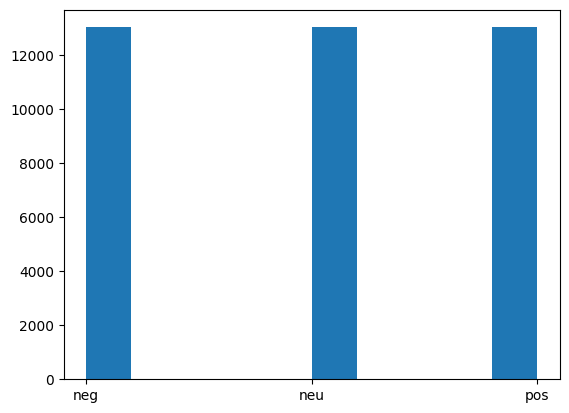

In [ ]:
plt.hist(selected_data.sentiment)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# สมมติว่า selected_data คือ DataFrame ของคุณ
# selected_data = ...

# ดึงข้อมูล text และ sentiment
texts = selected_data['text'].values
labels = selected_data['sentiment'].values

# ใช้ LabelEncoder เพื่อเข้ารหัส labels
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

# ทำการแทนค่าในคอลัม 'sentiment' ด้วย encoded_labels
selected_data['sentiment'] = encoded_labels

# แสดง DataFrame หรือตรวจสอบค่าหลังจากการแทนที่
print(len(selected_data))
selected_data.iloc[39:]


39090


,comment_id,text,sentiment
39,Ugwmlvg3gmnI3aj4nnF4AaABAg,บทเรียนครั้งนี้หวังว่าจะเป็นบทเรียนที่ราคาแพงต...,1
40,UgxRoMmx8TW7DPnQBZV4AaABAg,ไม่เป็นไรนะคะคุณพิธาเข้าใจว่าจะเป็นประชาธิปไตย...,2
41,UgwQ4cJsHvH_iv--aYh4AaABAg,เศร้าคะบอกตรงใบหน้าที่ไม่คุ้นเคย,0
42,UgxMvgwtdapRcE4049t4AaABAg,เสียใจมากค่ะ,0
43,Ugw4eyzIYJGPVKdIRLJ4AaABAg,วันนี้โลกรู้แล้วษวษษที่ชอบกินกล้วยทำชาดเสียหาย...,0
...,...,...,...
148882,Ugy7wTbOd4fuJwgPMYZ4AaABAg,ผมชอบมาก,2
148906,Ugxqy5KQJv3wNEJQrr54AaABAg,ลุงป้มสู้ๆ,2
148922,UgxCFTmAgVJq63nqBa54AaABAg,ขอบคุณเพื่อไทยที่ยึดมั่นจับมือกันไว้นะคะ,2
148927,UgyCRG80MThcA4GRfMx4AaABAg,ขอให้8พรรคจับมือกันให้แน่นอย่าข้ามขั้วเป็นฝ่าย...,2


In [ ]:
# สมมติว่า encoder เป็น LabelEncoder ที่ถูกใช้ในการเข้ารหัส
# encoded_labels เป็นค่าที่ได้จากการเข้ารหัส

# ใช้ inverse_transform เพื่อแปลงค่าที่เข้ารหัสกลับไปเป็นค่าเดิม
original_labels = encoder.inverse_transform(encoded_labels)

# ตอนนี้ original_labels จะเป็นค่าเดิมของ sentimets
print(original_labels[1000])
print(encoded_labels[1000])

pos
2


In [ ]:
def create_data(data, test_size=0.2, random_state=42):

    # สมมติว่า DataFrame ของคุณมีคอลัมน์ที่ชื่อว่า 'text' และ 'sentiment'
    x = data[['text']]
    y = data[['sentiment']]

    # แบ่งข้อมูลเป็น train และ test (โดยให้แบ่งตามคลาส)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)

    # รวมคุณลักษณะและป้ายชื่อกลับมาเป็น DataFrames ของ train และ test
    train = x_train.join(y_train)
    test = x_test.join(y_test)

    # บันทึกข้อมูลการฝึก และการทดสอบเป็นไฟล์ CSV
    train.to_csv("train.csv", index=False)
    test.to_csv("test.csv", index=False)

    return train, test

# สมมติว่า stdf คือ DataFrame ของคุณ
train, test = create_data(selected_data, test_size=0.2, random_state=42)



In [ ]:
print(len(train))
train

31272


,text,sentiment
14804,ประสิทเจียวก็คนดี,1
59123,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,2
20496,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมืองใบหน้ายิ้มอ้าปากและหลับตาแน่น,1
19489,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชนถึงไม่ได้เป็นนายกนั่งในสภาฯแต่คุณเป็นนายกที่นั่งในหัวใจคนไทยที่รักคุณอยู่ทั่วโลกค่ะเรานั่งดูอยู่ยุโรปถึงกับน้ำตาซึมอดทนนะคะอีก4ปีข้างหน้าไม่นานหรอกค่ะเพราะประชาชนก็ยังรอคุณ,2
27106,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือนประเทศพม่า,0
...,...,...
60060,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,2
121618,555สุดยอดเลย,2
24863,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาชนเลือกเขาให้เป็นนายกพวกมึงไมากี่คนใช้อำนาจผิดไม่ให้เป็นนายกอิจฉากันไงพวกเ,0
84423,สุดยอดครับ,2


In [ ]:
test

,text,sentiment
1366,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,1
1048,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,2
17952,สู้เงินไม่ได้,1
1308,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเราเสียใจกับเพื่อไทยแบบการที่เราเชียร์ใครเสียใจไปกับเขามาเป็นเวลาหลายปีทั้งที่เราไม่มีอะไรจะกินเรายังห่วงพรรคเขาดูเขาทำกับประชาชนที่รักเขาเขาอยู่ดีกินดีทำเพื่อพรรคพวกตัวเองดีทียังมีโอกาสตาสว่างขอบคุณนะเดียวประชาชนจะสอนบทเรียนให้เพี่อไทยเราชาวพุทธเชื่อการทำดีทำชั่วมีผลแน่นอนช้าเร็วได้เห็นแน่ใบหน้าที่ร้องไห้,1
44907,ชอบคุนนะชาดา,2
...,...,...
49677,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื่อไทยและก้าวไกลอยู่แล้วสุดท้ายเขาจะตีความว่าจะเสนอชื่อคนเดิมไม่ได้เตรียมนับองค์ประชุงล่วงหน้าได้เลย,0
10145,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้ายประธานสภาก็ไม่ทันเกมสว,0
26901,เป็นกำลังใจให้คุณพิธาค่ะ,2
94570,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาสตร์ชาติไทยเป็นมาอย่างไรรู้จักเคารพกฏหมายบ้านเมืองรู้จักหน้าที่ของตนเองรู้จักการวางตัวในสังคมรู้จักเคารพผู้ใหญ่รู้จักการพูดจาที่ดีมีเหตุผลรู้จักรักชาติบ้านเมืองรู้จักแยกแยะความผิดถูกดว้ยเหตุผลรู้จักยอมรับในการพ่ายแพ้และอื่นๆขอชื่นชมที่ท่านทำหน้าที่สวได้ดีและถูกต้อง,2


In [ ]:
# Reduce data size for faster executions.
train = train[:5000]
# test = test[:1000]

In [ ]:
train

,text,sentiment
16085,ฉิบหายและเอาพระพุทธมาเล่นแล้วบอกว่าพระพุทธเจ้า...,0
18973,ประหารได้ยัง,1
35091,ฟังสีส้มมาเขาบอกเบื้องบนมีคำสั่งให้สวยกมือให้พ...,0
50171,ก้าวไกลดีแต่พูดเอาแต่ใจตัวเองอ้างแต่14ล้านเสีย...,0
10338,คนที่มีมือพับขอบคุณท่านที่เห็นค่าเสียงของประชา...,2
...,...,...
82784,ดีครับร้านรุ้งจะได้ไม่ไปกินขอบคุณด้อมส้มจากใจใ...,2
17983,รู้ว่ามีหุ้นพิธาไม่จัดการโอนหรือตั้งใจ,1
2044,4ปีข้างหน้าคุณจะได้คะแนนเพิ่มอีกมายเพาะคุณมีจุ...,2
21038,เขาเสี้ยมให้กับพทแตกกันอยู่แล้ว,1


In [ ]:
validation

,text,sentiment
30940,ยายเอ้ยกลับบ้านเถอะจะร้องไห้เพื่อไรใครให้มายุ่...,0
47788,สวใช้คำทำลายชาติเลยเหรอ,0
23953,ไอ้สัตว์ขอให้มึงรับกรรมที่มุงทำกับแม่10เท่า,0
132978,เยี่ยมครับนับถือทันเกมทันคนทันเวลาได้ใจครัย,2
11885,เยี่ยมสุดยอดท่านคือนายยก,2
...,...,...
1196,คุณคนนี้ซิมีสัจจะคุณธรรมประจำใจ,1
50819,อย่าหาทำจะมีแต่คดีทำม็อบมา89พวกมีอำนาจยิ่งแข็ง...,0
5401,ประชาชนเขาเรียกคนไม่ไช้เรียกควายไปเถียงกันในสภา,0
59949,เรสรักคุนสู้ๆๆนะค่ะ,2


### Data Distribution & Up Sampling using SMOTE

<Axes: >

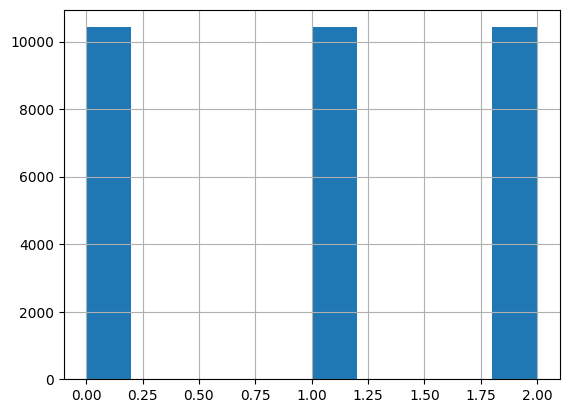

In [ ]:
train["sentiment"].hist()

<Axes: >

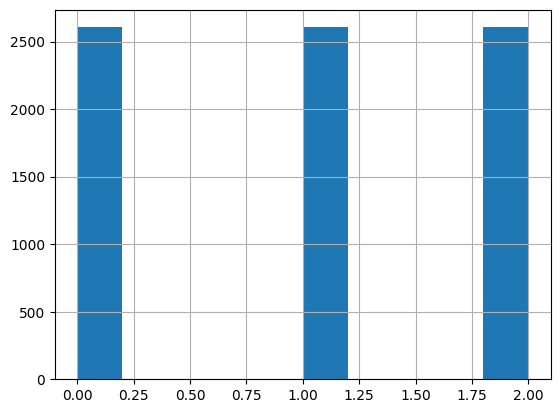

In [ ]:
test["sentiment"].hist()

<Axes: >

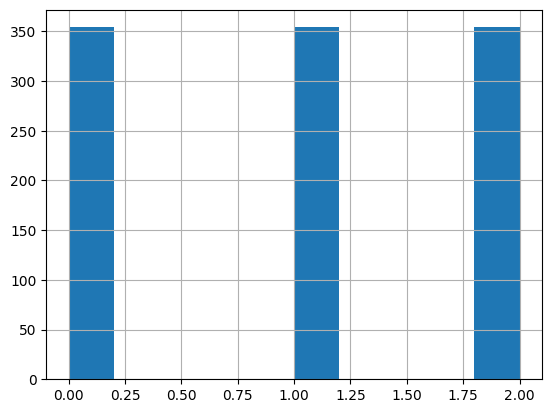

In [ ]:
validation["sentiment"].hist()

#### Cleaning Data

In [ ]:
len(train)

23454

In [ ]:
# Remove all HTML tag
#a = data['b'].str.replace(r'<[^<>]*>', '', regex=True)
train['clean_text'] = train['text'].str.replace(r'<[^<>]*>', '', regex=True)
test['clean_text'] = test['text'].str.replace(r'<[^<>]*>', '', regex=True)
# validation['clean_text'] = validation['text'].str.replace(r'<[^<>]*>', '', regex=True)

# Remove all excessive space, special characters and new line symbols
train['clean2_text'] = train['clean_text'].str.strip().str.lower().str.replace('\r+', ' ').str.replace('\n+',' ').str.replace('\t+',' ')
test['clean2_text'] = test['clean_text'].str.strip().str.lower().str.replace('\r+', ' ').str.replace('\n+',' ').str.replace('\t+',' ')
# validation['clean2_text'] = validation['clean_text'].str.strip().str.lower().str.replace('\r+', ' ').str.replace('\n+',' ').str.replace('\t+',' ')

<ipython-input-86-efda89f12fe6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train['clean2_text'] = train['clean_text'].str.strip().str.lower().str.replace('\r+', ' ').str.replace('\n+',' ').str.replace('\t+',' ')
<ipython-input-86-efda89f12fe6>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  test['clean2_text'] = test['clean_text'].str.strip().str.lower().str.replace('\r+', ' ').str.replace('\n+',' ').str.replace('\t+',' ')


In [ ]:
#Remove emoji
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

train['clean3_text'] = train.apply(lambda row: deEmojify(row['clean2_text']), axis=1)
test['clean3_text'] = test.apply(lambda row: deEmojify(row['clean2_text']), axis=1)
# validation['clean3_text'] = validation.apply(lambda row: deEmojify(row['clean2_text']), axis=1)


In [ ]:
train

,text,sentiment,clean_text,clean2_text,clean3_text
0,ประสิทเจียวก็คนดี,1,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี
1,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,2,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ
2,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมืองใบหน้ายิ้มอ้าปากและหลับตาแน่น,1,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมืองใบหน้ายิ้มอ้าปากและหลับตาแน่น,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมืองใบหน้ายิ้มอ้าปากและหลับตาแน่น,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมืองใบหน้ายิ้มอ้าปากและหลับตาแน่น
3,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชนถึงไม่ได้เป็นนายกนั่งในสภาฯแต่คุณเป็นนายกที่นั่งในหัวใจคนไทยที่รักคุณอยู่ทั่วโลกค่ะเรานั่งดูอยู่ยุโรปถึงกับน้ำตาซึมอดทนนะคะอีก4ปีข้างหน้าไม่นานหรอกค่ะเพราะประชาชนก็ยังรอคุณ,2,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชนถึงไม่ได้เป็นนายกนั่งในสภาฯแต่คุณเป็นนายกที่นั่งในหัวใจคนไทยที่รักคุณอยู่ทั่วโลกค่ะเรานั่งดูอยู่ยุโรปถึงกับน้ำตาซึมอดทนนะคะอีก4ปีข้างหน้าไม่นานหรอกค่ะเพราะประชาชนก็ยังรอคุณ,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชนถึงไม่ได้เป็นนายกนั่งในสภาฯแต่คุณเป็นนายกที่นั่งในหัวใจคนไทยที่รักคุณอยู่ทั่วโลกค่ะเรานั่งดูอยู่ยุโรปถึงกับน้ำตาซึมอดทนนะคะอีก4ปีข้างหน้าไม่นานหรอกค่ะเพราะประชาชนก็ยังรอคุณ,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชนถึงไม่ได้เป็นนายกนั่งในสภาฯแต่คุณเป็นนายกที่นั่งในหัวใจคนไทยที่รักคุณอยู่ทั่วโลกค่ะเรานั่งดูอยู่ยุโรปถึงกับน้ำตาซึมอดทนนะคะอีก4ปีข้างหน้าไม่นานหรอกค่ะเพราะประชาชนก็ยังรอคุณ
4,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือนประเทศพม่า,0,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือนประเทศพม่า,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือนประเทศพม่า,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือนประเทศพม่า
...,...,...,...,...,...
31267,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,2,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ
31268,555สุดยอดเลย,2,555สุดยอดเลย,555สุดยอดเลย,555สุดยอดเลย
31269,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาชนเลือกเขาให้เป็นนายกพวกมึงไมากี่คนใช้อำนาจผิดไม่ให้เป็นนายกอิจฉากันไงพวกเ,0,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาชนเลือกเขาให้เป็นนายกพวกมึงไมากี่คนใช้อำนาจผิดไม่ให้เป็นนายกอิจฉากันไงพวกเ,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาชนเลือกเขาให้เป็นนายกพวกมึงไมากี่คนใช้อำนาจผิดไม่ให้เป็นนายกอิจฉากันไงพวกเ,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาชนเลือกเขาให้เป็นนายกพวกมึงไมากี่คนใช้อำนาจผิดไม่ให้เป็นนายกอิจฉากันไงพวกเ
31270,สุดยอดครับ,2,สุดยอดครับ,สุดยอดครับ,สุดยอดครับ


### Text Normalization / Word Segmentation / Stop words filtering

In [ ]:
! pip -q install pythainlp python-crfsuite

In [ ]:
from pythainlp.util import normalize
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

stopwords = list(thai_stopwords())
stopwords.append("nan")
stopwords.append("-")
stopwords.append("_")
stopwords.append("")
stopwords.append(" ")

# Normalize text
train['clean4_text'] = train.apply(lambda row: normalize(row['clean3_text']), axis=1) #clean3_text
test['clean4_text'] = test.apply(lambda row: normalize(row['clean3_text']), axis=1)
# validation['clean4_text'] = validation.apply(lambda row: normalize(row['clean3_text']), axis=1)


# Word segmentation: it will take a while....
train['wordseged_text'] = train.apply(lambda row: word_tokenize(row['clean4_text'],engine="newmm-safe"), axis=1)
test['wordseged_text'] = test.apply(lambda row: word_tokenize(row['clean4_text'],engine="newmm-safe"), axis=1)
# validation['wordseged_text'] = validation.apply(lambda row: word_tokenize(row['clean4_text'],engine="newmm-safe"), axis=1)

# Remove stopwords, it will take a very long time.....
#train['wordseged_nostopword_text'] = train.apply(lambda row: [i for i in train['wordseged_text'] if i not in stopwords], axis=1)
#test['wordseged_nostopword_text'] = test.apply(lambda row: [i for i in test['wordseged_text'] if i not in stopwords], axis=1)

# Join the wordsegged with space
train['wordseged_space_text'] = train.apply(lambda row: " ".join(row["wordseged_text"]), axis=1)
test['wordseged_space_text'] = test.apply(lambda row: " ".join(row["wordseged_text"]), axis=1)
# validation['wordseged_space_text'] = validation.apply(lambda row: " ".join(row["wordseged_text"]), axis=1)


In [ ]:
# train1 = train.drop(columns=['wordseged_nostopword_text'] )
# test1 = test.drop(columns=['wordseged_nostopword_text'])
# train1.head()

In [ ]:
# # Save training and testing data as CSV files
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
# validation.to_csv("validation.csv", index=False)

In [ ]:
test

,text,sentiment,clean_text,clean2_text,clean3_text,clean4_text,wordseged_text,wordseged_space_text
0,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,1,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,"[สมัย, หน้า, พรรค, คุณ, มี, เก้าอี้, เพิ่ม, แน่นอน, ครับ]",สมัย หน้า พรรค คุณ มี เก้าอี้ เพิ่ม แน่นอน ครับ
1,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,2,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,"[สม, แล้ว, ค่ะ, ที่, ชื่อ, พรรคเป็นธรรม]",สม แล้ว ค่ะ ที่ ชื่อ พรรคเป็นธรรม
2,สู้เงินไม่ได้,1,สู้เงินไม่ได้,สู้เงินไม่ได้,สู้เงินไม่ได้,สู้เงินไม่ได้,"[สู้, เงิน, ไม่, ได้]",สู้ เงิน ไม่ ได้
3,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเราเสียใจกับเพื่อไทยแบบการที่เราเชียร์ใครเสียใจไปกับเขามาเป็นเวลาหลายปีทั้งที่เราไม่มีอะไรจะกินเรายังห่วงพรรคเขาดูเขาทำกับประชาชนที่รักเขาเขาอยู่ดีกินดีทำเพื่อพรรคพวกตัวเองดีทียังมีโอกาสตาสว่างขอบคุณนะเดียวประชาชนจะสอนบทเรียนให้เพี่อไทยเราชาวพุทธเชื่อการทำดีทำชั่วมีผลแน่นอนช้าเร็วได้เห็นแน่ใบหน้าที่ร้องไห้,1,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเราเสียใจกับเพื่อไทยแบบการที่เราเชียร์ใครเสียใจไปกับเขามาเป็นเวลาหลายปีทั้งที่เราไม่มีอะไรจะกินเรายังห่วงพรรคเขาดูเขาทำกับประชาชนที่รักเขาเขาอยู่ดีกินดีทำเพื่อพรรคพวกตัวเองดีทียังมีโอกาสตาสว่างขอบคุณนะเดียวประชาชนจะสอนบทเรียนให้เพี่อไทยเราชาวพุทธเชื่อการทำดีทำชั่วมีผลแน่นอนช้าเร็วได้เห็นแน่ใบหน้าที่ร้องไห้,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเราเสียใจกับเพื่อไทยแบบการที่เราเชียร์ใครเสียใจไปกับเขามาเป็นเวลาหลายปีทั้งที่เราไม่มีอะไรจะกินเรายังห่วงพรรคเขาดูเขาทำกับประชาชนที่รักเขาเขาอยู่ดีกินดีทำเพื่อพรรคพวกตัวเองดีทียังมีโอกาสตาสว่างขอบคุณนะเดียวประชาชนจะสอนบทเรียนให้เพี่อไทยเราชาวพุทธเชื่อการทำดีทำชั่วมีผลแน่นอนช้าเร็วได้เห็นแน่ใบหน้าที่ร้องไห้,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเราเสียใจกับเพื่อไทยแบบการที่เราเชียร์ใครเสียใจไปกับเขามาเป็นเวลาหลายปีทั้งที่เราไม่มีอะไรจะกินเรายังห่วงพรรคเขาดูเขาทำกับประชาชนที่รักเขาเขาอยู่ดีกินดีทำเพื่อพรรคพวกตัวเองดีทียังมีโอกาสตาสว่างขอบคุณนะเดียวประชาชนจะสอนบทเรียนให้เพี่อไทยเราชาวพุทธเชื่อการทำดีทำชั่วมีผลแน่นอนช้าเร็วได้เห็นแน่ใบหน้าที่ร้องไห้,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเราเสียใจกับเพื่อไทยแบบการที่เราเชียร์ใครเสียใจไปกับเขามาเป็นเวลาหลายปีทั้งที่เราไม่มีอะไรจะกินเรายังห่วงพรรคเขาดูเขาทำกับประชาชนที่รักเขาเขาอยู่ดีกินดีทำเพื่อพรรคพวกตัวเองดีทียังมีโอกาสตาสว่างขอบคุณนะเดียวประชาชนจะสอนบทเรียนให้เพี่อไทยเราชาวพุทธเชื่อการทำดีทำชั่วมีผลแน่นอนช้าเร็วได้เห็นแน่ใบหน้าที่ร้องไห้,"[สัจจะ, กิน, ไม่, ได้, แต่, มัน, ทำให้, คุณ, สูงส่ง, พูด, ดี, ทำดี, เรา, เสียใจ, กับ, เพื่อ, ไทย, แบบ, การ, ที่, เรา, เชียร์, ใคร, เสียใจ, ไป, กับ, เขา, มา, เป็นเวลา, หลาย, ปี, ทั้งที่, เรา, ไม่, มี, อะไร, จะ, กิน, เรา, ยัง, ห่วง, พรรค, เขา, ดู, เขา, ทำ, กับ, ประชาชน, ที่รัก, เขา, เขา, อยู่ดีกินดี, ทำ, เพื่อ, พรรคพวก, ตัวเอง, ดี, ที, ยัง, มีโอกาส, ตาสว่าง, ขอบคุณ, นะ, เดียว, ประชาชน, จะ, สอน, บทเรียน, ให้, เพ, ี่อ, ไทย, เรา, ชาวพุทธ, เชื่อ, การทำดี, ทำชั่ว, มีผล, แน่นอน, ช้า, เร็ว, ได้, เห็น, แน่, ใบ, หน้าที่, ร้องไห้]",สัจจะ กิน ไม่ ได้ แต่ มัน ทำให้ คุณ สูงส่ง พูด ดี ทำดี เรา เสียใจ กับ เพื่อ ไทย แบบ การ ที่ เรา เชียร์ ใคร เสียใจ ไป กับ เขา มา เป็นเวลา หลาย ปี ทั้งที่ เรา ไม่ มี อะไร จะ กิน เรา ยัง ห่วง พรรค เขา ดู เขา ทำ กับ ประชาชน ที่รัก เขา เขา อยู่ดีกินดี ทำ เพื่อ พรรคพวก ตัวเอง ดี ที ยัง มีโอกาส ตาสว่าง ขอบคุณ นะ เดียว ประชาชน จะ สอน บทเรียน ให้ เพ ี่อ ไทย เรา ชาวพุทธ เชื่อ การทำดี ทำชั่ว มีผล แน่นอน ช้า เร็ว ได้ เห็น แน่ ใบ หน้าที่ ร้องไห้
4,ชอบคุนนะชาดา,2,ชอบคุนนะชาดา,ชอบคุนนะชาดา,ชอบคุนนะชาดา,ชอบคุนนะชาดา,"[ชอบ, คุ, น, นะ, ชา, ดา]",ชอบ คุ น นะ ชา ดา
...,...,...,...,...,...,...,...,...
7813,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื่อไทยและก้าวไกลอยู่แล้วสุดท้ายเขาจะตีความว่าจะเสนอชื่อคนเดิมไม่ได้เตรียมนับองค์ประชุงล่วงหน้าได้เลย,0,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื่อไทยและก้าวไกลอยู่แล้วสุดท้ายเขาจะตีความว่าจะเสนอชื่อคนเดิมไม่ได้เตรียมนับองค์ประชุงล่วงหน้าได้เลย,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื่อไทยและก้าวไกลอยู่แล้วสุดท้าย

In [ ]:
validation

,text,sentiment,clean_text,clean2_text,clean3_text,clean4_text,wordseged_text,wordseged_space_text
30940,ยายเอ้ยกลับบ้านเถอะจะร้องไห้เพื่อไรใครให้มายุ่...,0,ยายเอ้ยกลับบ้านเถอะจะร้องไห้เพื่อไรใครให้มายุ่...,ยายเอ้ยกลับบ้านเถอะจะร้องไห้เพื่อไรใครให้มายุ่...,ยายเอ้ยกลับบ้านเถอะจะร้องไห้เพื่อไรใครให้มายุ่...,ยายเอ้ยกลับบ้านเถอะจะร้องไห้เพื่อไรใครให้มายุ่...,"[ยาย, เอ้ย, กลับบ้าน, เถอะ, จะ, ร้องไห้, เพื่อ...",ยาย เอ้ย กลับบ้าน เถอะ จะ ร้องไห้ เพื่อ ไร ใคร...
47788,สวใช้คำทำลายชาติเลยเหรอ,0,สวใช้คำทำลายชาติเลยเหรอ,สวใช้คำทำลายชาติเลยเหรอ,สวใช้คำทำลายชาติเลยเหรอ,สวใช้คำทำลายชาติเลยเหรอ,"[สว, ใช้, คำ, ทำลาย, ชาติ, เลย, เหรอ]",สว ใช้ คำ ทำลาย ชาติ เลย เหรอ
23953,ไอ้สัตว์ขอให้มึงรับกรรมที่มุงทำกับแม่10เท่า,0,ไอ้สัตว์ขอให้มึงรับกรรมที่มุงทำกับแม่10เท่า,ไอ้สัตว์ขอให้มึงรับกรรมที่มุงทำกับแม่10เท่า,ไอ้สัตว์ขอให้มึงรับกรรมที่มุงทำกับแม่10เท่า,ไอ้สัตว์ขอให้มึงรับกรรมที่มุงทำกับแม่10เท่า,"[ไอ้, สัตว์, ขอให้, มึง, รับ, กรรม, ที่, มุง, ...",ไอ้ สัตว์ ขอให้ มึง รับ กรรม ที่ มุง ทำ กับ แม...
132978,เยี่ยมครับนับถือทันเกมทันคนทันเวลาได้ใจครัย,2,เยี่ยมครับนับถือทันเกมทันคนทันเวลาได้ใจครัย,เยี่ยมครับนับถือทันเกมทันคนทันเวลาได้ใจครัย,เยี่ยมครับนับถือทันเกมทันคนทันเวลาได้ใจครัย,เยี่ยมครับนับถือทันเกมทันคนทันเวลาได้ใจครัย,"[เยี่ยม, ครับ, นับถือ, ทันเกม, ทันคน, ทันเวลา,...",เยี่ยม ครับ นับถือ ทันเกม ทันคน ทันเวลา ได้ใจ ...
11885,เยี่ยมสุดยอดท่านคือนายยก,2,เยี่ยมสุดยอดท่านคือนายยก,เยี่ยมสุดยอดท่านคือนายยก,เยี่ยมสุดยอดท่านคือนายยก,เยี่ยมสุดยอดท่านคือนายยก,"[เยี่ยม, สุดยอด, ท่าน, คือ, นาย, ยก]",เยี่ยม สุดยอด ท่าน คือ นาย ยก
...,...,...,...,...,...,...,...,...
1196,คุณคนนี้ซิมีสัจจะคุณธรรมประจำใจ,1,คุณคนนี้ซิมีสัจจะคุณธรรมประจำใจ,คุณคนนี้ซิมีสัจจะคุณธรรมประจำใจ,คุณคนนี้ซิมีสัจจะคุณธรรมประจำใจ,คุณคนนี้ซิมีสัจจะคุณธรรมประจำใจ,"[คุณ, คน, นี้, ซิ, มีสัจจะ, คุณธรรม, ประจำใจ]",คุณ คน นี้ ซิ มีสัจจะ คุณธรรม ประจำใจ
50819,อย่าหาทำจะมีแต่คดีทำม็อบมา89พวกมีอำนาจยิ่งแข็ง...,0,อย่าหาทำจะมีแต่คดีทำม็อบมา89พวกมีอำนาจยิ่งแข็ง...,อย่าหาทำจะมีแต่คดีทำม็อบมา89พวกมีอำนาจยิ่งแข็ง...,อย่าหาทำจะมีแต่คดีทำม็อบมา89พวกมีอำนาจยิ่งแข็ง...,อย่าหาทำจะมีแต่คดีทำม็อบมา89พวกมีอำนาจยิ่งแข็ง...,"[อย่า, หา, ทำ, จะ, มี, แต่, คดี, ทำ, ม็อบ, มา,...",อย่า หา ทำ จะ มี แต่ คดี ทำ ม็อบ มา 89 พวก มีอ...
5401,ประชาชนเขาเรียกคนไม่ไช้เรียกควายไปเถียงกันในสภา,0,ประชาชนเขาเรียกคนไม่ไช้เรียกควายไปเถียงกันในสภา,ประชาชนเขาเรียกคนไม่ไช้เรียกควายไปเถียงกันในสภา,ประชาชนเขาเรียกคนไม่ไช้เรียกควายไปเถียงกันในสภา,ประชาชนเขาเรียกคนไม่ไช้เรียกควายไปเถียงกันในสภา,"[ประชาชน, เขา, เรียก, คน, ไม่, ไช้, เรียก, ควา...",ประชาชน เขา เรียก คน ไม่ ไช้ เรียก ควาย ไป เถี...
59949,เรสรักคุนสู้ๆๆนะค่ะ,2,เรสรักคุนสู้ๆๆนะค่ะ,เรสรักคุนสู้ๆๆนะค่ะ,เรสรักคุนสู้ๆๆนะค่ะ,เรสรักคุนสู้ๆๆนะค่ะ,"[เร, ส, รัก, คุ, น, สู้, ๆๆ, นะ, ค่ะ]",เร ส รัก คุ น สู้ ๆๆ นะ ค่ะ


#NB

In [ ]:
# ติดตั้งไลบรารีที่จำเป็น
!pip install gensim
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install pythainlp python-crfsuite
!pip install deepcut


In [ ]:
from pythainlp import word_vector
import numpy as np
wv = word_vector.WordVector()

Corpus: thai2fit_wv
- Downloading: thai2fit_wv 0.1


  0%|          | 0/62452646 [00:00<?, ?it/s]

In [ ]:
!pip install fastai
!pip install https://github.com/PyThaiNLP/fastai-thai-models/releases/download/v0.1/thai2fit_0.0.1.tar.gz
!pip install scikit-learn


  ERROR: HTTP error 404 while getting https://github.com/PyThaiNLP/fastai-thai-models/releases/download/v0.1/thai2fit_0.0.1.tar.gz
ERROR: Could not install requirement https://github.com/PyThaiNLP/fastai-thai-models/releases/download/v0.1/thai2fit_0.0.1.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://github.com/PyThaiNLP/fastai-thai-models/releases/download/v0.1/thai2fit_0.0.1.tar.gz for URL https://github.com/PyThaiNLP/fastai-thai-models/releases/download/v0.1/thai2fit_0.0.1.tar.gz


In [ ]:
!pip install pythainlp fastai
!pip install emoji
!pip install joblib


In [ ]:
import numpy as np
import pandas as pd
import re
import pythainlp
from pythainlp.corpus.common import thai_words
# from pythainlp.tokenize import dict_trie, word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import glob
import matplotlib.pyplot as plt
from pythainlp.tokenize import word_tokenize
%matplotlib inline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Assuming you have the create_data function as you provided earlier
# Assuming you have the load_data function as you provided earlier

# Load the training and testing data from CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Split the data into features (X) and labels (y)
X_train, y_train = train['wordseged_space_text'], train['sentiment']
X_test, y_test = test['wordseged_space_text'], test['sentiment']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions on training and validation set
y_train_pred = nb_classifier.predict(X_train_tfidf)
y_val_pred = nb_classifier.predict(X_val_tfidf)

# Calculate accuracy on training and validation set
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')


# Predictions on the test set
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')

# Classification Report
print(classification_report(y_test, y_test_pred))



Training Accuracy: 0.7759123795818843
Validation Accuracy: 0.7183053557154276
Test Accuracy: 0.7137375287797391
              precision    recall  f1-score   support

           0       0.63      0.85      0.73      2606
           1       0.71      0.48      0.58      2606
           2       0.82      0.81      0.82      2606

    accuracy                           0.71      7818
   macro avg       0.72      0.71      0.71      7818
weighted avg       0.72      0.71      0.71      7818



In [ ]:
import joblib

# Save the model to a file
joblib.dump(nb_classifier, 'naive_bayes_model.pkl')

# Load the model from the file
loaded_nb_classifier = joblib.load('naive_bayes_model.pkl')

# Predictions on the test set using the loaded model
y_test_pred_loaded = loaded_nb_classifier.predict(X_test_tfidf)

# Calculate accuracy on the test set
test_accuracy_loaded = accuracy_score(y_test, y_test_pred_loaded)

print(f'Test Accuracy (Loaded Model): {test_accuracy_loaded}')

# Classification Report for the loaded model
print(classification_report(y_test, y_test_pred_loaded))


Test Accuracy (Loaded Model): 0.7137375287797391
              precision    recall  f1-score   support

           0       0.63      0.85      0.73      2606
           1       0.71      0.48      0.58      2606
           2       0.82      0.81      0.82      2606

    accuracy                           0.71      7818
   macro avg       0.72      0.71      0.71      7818
weighted avg       0.72      0.71      0.71      7818



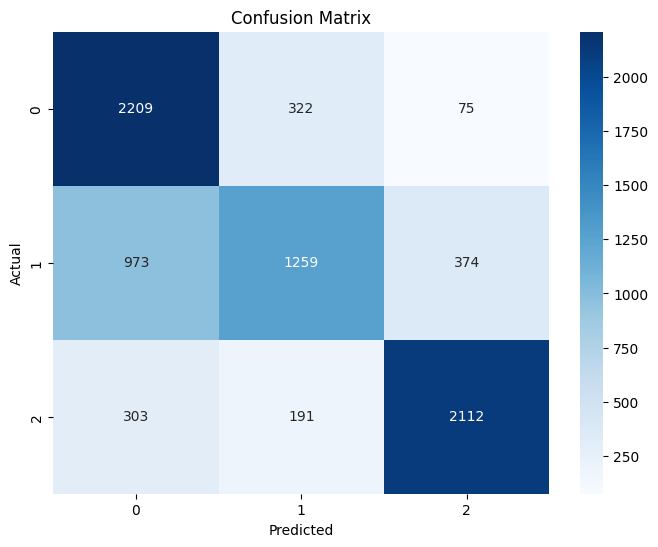

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Predictions on the test set
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Get unique labels in the dataset
labels = sorted(y_test.unique())

# Plot confusion matrix
plot_confusion_matrix(y_test, y_test_pred, labels)


In [ ]:
from sklearn.metrics import classification_report

# Predictions on the test set
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Classification Report
report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.63      0.85      0.73      2606
           1       0.71      0.48      0.58      2606
           2       0.82      0.81      0.82      2606

    accuracy                           0.71      7818
   macro avg       0.72      0.71      0.71      7818
weighted avg       0.72      0.71      0.71      7818



In [ ]:
from gensim.models import Word2Vec

# Tokenize ข้อความ (ต้องติดตั้ง gensim)
tokenized_text = [text.split() for text in X_train]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Transform text to word vectors
def get_word_vectors(text, model):
    vectors = []
    for word in text.split():
        if word in model.wv:
            vectors.append(model.wv[word])
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Apply Word2Vec to each row
X_train_word2vec = np.array([get_word_vectors(text, word2vec_model) for text in X_train])
X_val_word2vec = np.array([get_word_vectors(text, word2vec_model) for text in X_val])
X_test_word2vec = np.array([get_word_vectors(text, word2vec_model) for text in X_test])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have the create_data function as you provided earlier
# Assuming you have the load_data function as you provided earlier

# Load the training and testing data from CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Split the data into features (X) and labels (y)
X_train, y_train = train['wordseged_space_text'], train['sentiment']
X_test, y_test = test['wordseged_space_text'], test['sentiment']

# Tokenize the text
tokenized_text_train = [text.split() for text in X_train]
tokenized_text_test = [text.split() for text in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text_train, vector_size=100, window=5, min_count=1, workers=4)

# Apply Word2Vec to each row
X_train_word2vec = np.array([get_word_vectors(text, word2vec_model) for text in X_train])
X_test_word2vec = np.array([get_word_vectors(text, word2vec_model) for text in X_test])

# Flatten the Word2Vec arrays
X_train_word2vec_flat = X_train_word2vec.reshape(X_train_word2vec.shape[0], -1)
X_test_word2vec_flat = X_test_word2vec.reshape(X_test_word2vec.shape[0], -1)

# Calculate statistics from vectors (e.g., mean, min, max)
X_train_stats = np.array([np.mean(vectors, axis=0) for vectors in X_train_word2vec])
X_test_stats = np.array([np.mean(vectors, axis=0) for vectors in X_test_word2vec])

# Reshape the 1D array to 2D array
X_train_stats_2d = X_train_stats.reshape(-1, 1)
X_test_stats_2d = X_test_stats.reshape(-1, 1)

# Train RandomForestClassifier
rf_classifier_word2vec_stats = RandomForestClassifier()
rf_classifier_word2vec_stats.fit(X_train_stats_2d, y_train)

# Predictions on the test set
y_test_pred_rf_word2vec_stats = rf_classifier_word2vec_stats.predict(X_test_stats_2d)

# Evaluate the model
print(classification_report(y_test, y_test_pred_rf_word2vec_stats))

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_rf_word2vec_stats)
print(f'Test Accuracy: {test_accuracy}')


              precision    recall  f1-score   support

           0       0.41      0.41      0.41      2606
           1       0.39      0.39      0.39      2606
           2       0.49      0.48      0.48      2606

    accuracy                           0.43      7818
   macro avg       0.43      0.43      0.43      7818
weighted avg       0.43      0.43      0.43      7818

Test Accuracy: 0.42824251726784346


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline
# from pythainlp.tokenize import word_tokenize
# from gensim.models import Word2Vec
# import numpy as np

# # ข้อมูลที่ถูกแบ่งแล้ว
# x_train, y_train = train['text'].values, train['sentiment'].values
# x_val, y_val = validation['text'].values, validation['sentiment'].values
# x_test, y_test = test['text'].values, test['sentiment'].values
# wv = word_vector.WordVector()
# # สร้าง Word2Vec model
# word2vec_model = wv.get_model()

# # Function สำหรับแปลงข้อความเป็น vector โดยใช้ Word2Vec model
# def text_to_vector(text):
#     tokens = word_tokenize(text, engine='deepcut')
#     vector = np.zeros((word2vec_model.vector_size,))
#     count = 0
#     for token in tokens:
#         if token in word2vec_model:
#             vector += word2vec_model[token]
#             count += 1
#     if count != 0:
#         vector /= count
#     return vector

# # แปลงข้อมูล train, validation, และ test เป็น vector โดยใช้ Word2Vec model
# x_train_vectors = np.array([text_to_vector(text) for text in x_train])
# x_val_vectors = np.array([text_to_vector(text) for text in x_val])
# x_test_vectors = np.array([text_to_vector(text) for text in x_test])

# # สร้างแบบจำลอง Naive Bayes
# model = make_pipeline(MultinomialNB())

# # ปรับแบบจำลองด้วยข้อมูล train
# model.fit(x_train_vectors, y_train)

# # ทดสอบแบบจำลองด้วยข้อมูล validation
# accuracy = model.score(x_val_vectors, y_val)
# print(f'Validation Accuracy: {accuracy}')

# # ทดสอบแบบจำลองด้วยข้อมูล test
# test_accuracy = model.score(x_test_vectors, y_test)
# print(f'Test Accuracy: {test_accuracy}')
